In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\소방청_세종시 119신고 정보 데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소방청_세종시 119신고 정보 데이터\\소방청_세종시 119신고 정보 데이터_12_31_2020.csv']

In [4]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,일련번호,접수경로명,접수일시,접수일시(상세),타시도신고여부
0,1,이동전화,2012-07-09,15:38:59,아니오
1,2,이동전화,2012-07-09,15:42:16,아니오
2,3,이동전화,2012-07-09,15:43:13,아니오
3,4,이동전화,2012-07-09,15:45:57,아니오
4,5,IP전화,2012-07-09,15:48:17,예


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617762 entries, 0 to 617761
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   일련번호      617762 non-null  int64 
 1   접수경로명     617755 non-null  object
 2   접수일시      617762 non-null  object
 3   접수일시(상세)  617762 non-null  object
 4   타시도신고여부   614668 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.6+ MB


In [6]:
df.describe()

,일련번호
count,617762.000000
mean,308881.500000
std,178332.672835
min,1.000000
25%,154441.250000
50%,308881.500000
75%,463321.750000
max,617762.000000


In [7]:
df.describe(include=np.object)

,접수경로명,접수일시,접수일시(상세),타시도신고여부
count,617755,617762,617762,614668
unique,17,3106,84529,2
top,이동전화,2016-09-12,08:59:00,아니오
freq,343726,814,270,602270


In [8]:
df.isnull().sum()

일련번호           0
접수경로명          7
접수일시           0
접수일시(상세)       0
타시도신고여부     3094
dtype: int64

## 전처리

In [9]:
df.fillna('None',inplace=True)

In [10]:
def convert_year(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.year
def convert_month(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.month
def convert_hour(x):
    dat = datetime.strptime(x,'%H:%M:%S')
    return dat.hour
df['접수년도'] = df['접수일시'].apply(convert_year)
df['접수월'] = df['접수일시'].apply(convert_month)
df['접수시'] = df['접수일시(상세)'].apply(convert_hour)

## 시각화

[Text(0.5, 1.0, '접수경로별 분포'), Text(0, 0.5, 'count')]

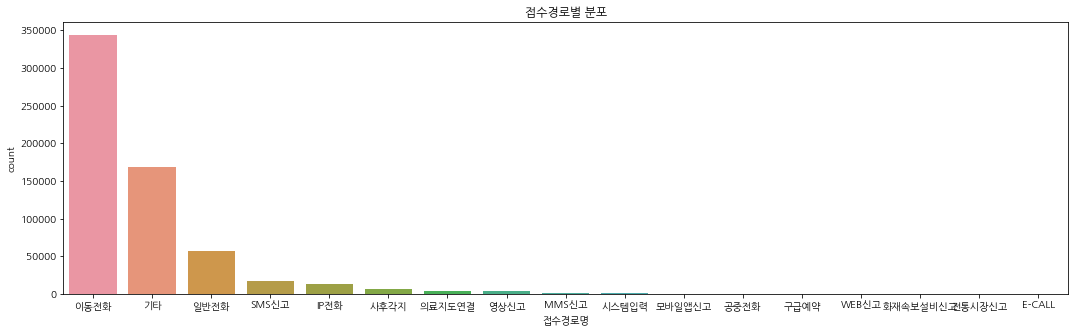

In [13]:
plt.figure(figsize=(18,5))
sub_df = df[df['접수경로명']!='None'].groupby('접수경로명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sns.barplot(data=sub_df,x='접수경로명',y='일련번호').set(title='접수경로별 분포',ylabel='count')

<AxesSubplot: title={'center': '타시도 신고여부'}, ylabel='count'>

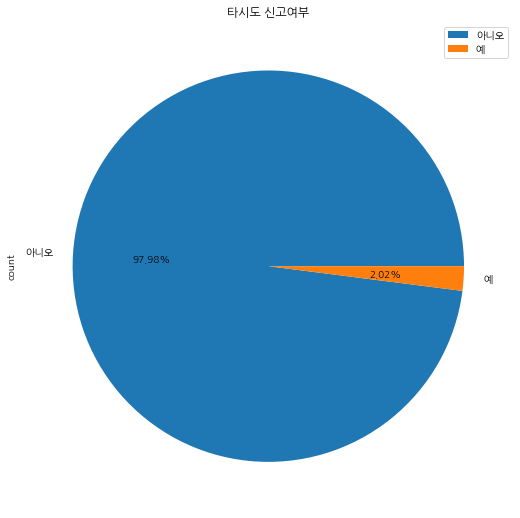

In [16]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df[df['타시도신고여부']!='None'].groupby('타시도신고여부',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sub_df.plot.pie(y='일련번호',labels=sub_df['타시도신고여부'].unique(),ax=ax,title='타시도 신고여부',autopct='%.2f%%',ylabel='count')

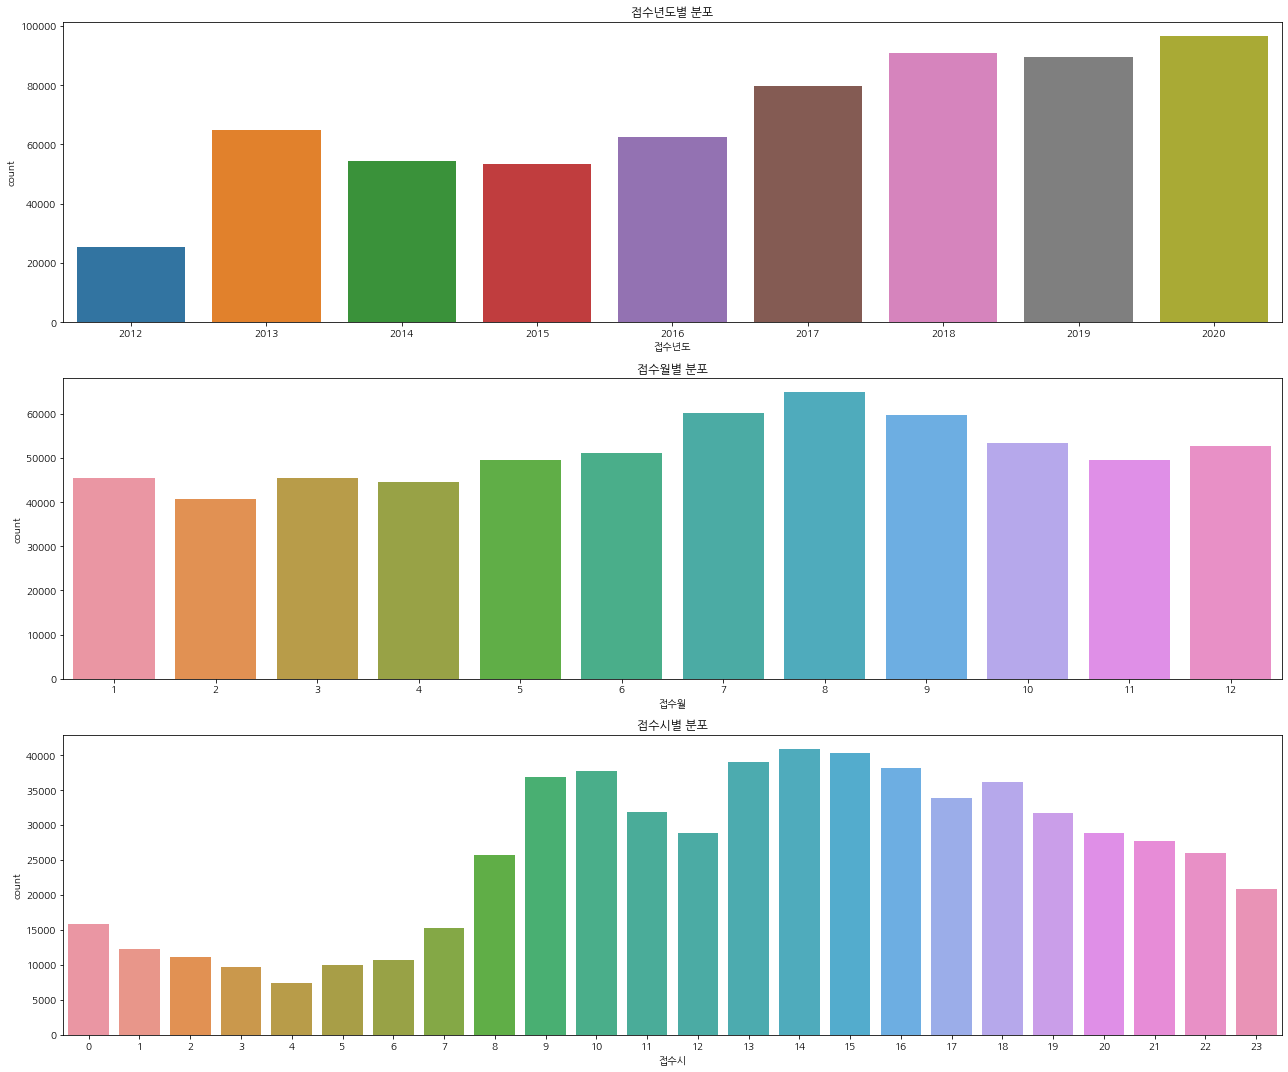

In [17]:
fig,axes = plt.subplots(3,1,figsize=(18,15))
cols = ['접수년도','접수월','접수시']
for i,c in enumerate(cols):
    sub_df = df.groupby(c,as_index=False)['일련번호'].count()
    sns.barplot(data=sub_df,x=c,y='일련번호',ax=axes[i]).set(title=f'{c}별 분포',ylabel='count')
plt.tight_layout()